# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [55]:
df.shape

(41188, 21)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [57]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [58]:
# Check for NaN type missing values
print("Nan counts per column:")
print(df.isnull().sum())

# Check for 'unknown' placeholders in categorical columns
print("/n 'Unkown' counts per column:")
(df == "unknown").sum(axis=0)

Nan counts per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
/n 'Unkown' counts per column:


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

## Explanation 

Although the dataset contains no NaN missing values, several categrical features use "unknown" as a 
placeholder for missing information. These values need to be handled before modeling

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Business Objective

The goal of this analysis is to evaluate the effectiveness of the bank’s direct marketing campaigns by predicting whether a client will subscribe to a term deposit (y). By building and comparing multiple classification models, the bank can identify the factors most associated with client conversion, reduce the cost of future campaigns, and improve targeting strategies to increase overall subscription rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [60]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Select just the bank client information features
bank_features = ["age", "job", "marital", "education", "default", "housing", "loan"]

X = df[bank_features]
y = df["y"].map({"no": 0, "yes": 1})  # target: convert to binary

# Separate numeric and categorical columns
numeric_features = ["age"]
categorical_features = ["job", "marital", "education", "default", "housing", "loan"]

# Preprocessing pipeline:
# - Standardize numeric values (important for some models like KNN and SVM)
# - One-hot encode categorical values
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

print("Features and target prepared for modeling!")


Features and target prepared for modeling!


Numeric features are standardized so that it is on the same scale as the other features
Categorical features are one-hot encoded allowing models to interpret them correctly. 
The target column "y" is mapped to binary values (yes=1, no=0).

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [61]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    # 30% for testing, 70% for training
    test_size=0.3,   
    
    random_state=42,     # ensures reproducibility
    stratify=y           # keeps the class distribution balanced
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 28831
Test set size: 12357


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline Accuracy Score.  

In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baseline model: always predict the most frequent class
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)

y_pred_baseline = baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))


Baseline Accuracy: 0.8873512988589464

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Analysis

The baseline model achieved an accuracy of 0.8873512988589464, or when rounded down to 1 decimal point, 88.7%, but the classification report 

Classification Report:


           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392
           
The label 0 represents customers who said “no”, while the label 1 represents customers who said “yes” in the marketing campaign. When the precision, recall, and F1-score for class 1 are all reported as 0, it means the model failed entirely to predict the minority class — the customers who actually subscribed to the term deposit.s). 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression with class_weight balanced
log_reg_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Train model
log_reg_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = log_reg_balanced.predict(X_test)

# Evaluate
print("Balanced Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

Balanced Logistic Regression Accuracy: 0.593590677348871

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72     10965
           1       0.16      0.62      0.26      1392

    accuracy                           0.59     12357
   macro avg       0.54      0.61      0.49     12357
weighted avg       0.84      0.59      0.67     12357



## Analysis
By applying class_weight="balanced", the Logistic Regression model shifted from predicting only the majority class (no) to correctly identifying many of the minority class (yes). While overall balanced Logistic Regression accuracy fell to 59.3%, recall for the yes class rose to 62%. This highlights the importance of evaluating multiple metrics beyond accuracy and the value of class balancing in imbalanced datasets.

### Problem 9: Score the Model

What is the accuracy of your model?

In [64]:
# Method 1: accuracy via .score()
log_reg_balanced.score(X_test, y_test)

# Method 2: accuracy via metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_balanced)


0.593590677348871

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [65]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

rows = []
best_models = {}

for name, pipe, param_grid in search_spaces:
    print(f"Grid searching: {name} ...")
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="f1",
        cv=5,
        n_jobs=-1,
        refit=True,
        verbose=0
    )
    t0 = time.time()
    gs.fit(X_train, y_train)
    t1 = time.time()

    best_models[name] = gs.best_estimator_

    y_pred_tr = gs.predict(X_train)
    y_pred_te = gs.predict(X_test)

    rows.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "CV Best F1": round(gs.best_score_, 3),
        "Train F1": round(f1_score(y_train, y_pred_tr), 3),
        "Test F1": round(f1_score(y_test, y_pred_te), 3),
        "Train Acc": round(accuracy_score(y_train, y_pred_tr), 3),
        "Test Acc": round(accuracy_score(y_test, y_pred_te), 3),
        "Test Recall (Yes)": round(recall_score(y_test, y_pred_te), 3),   # 👈 INSERTED HERE
        "Fit Time (s)": round(t1-t0, 2)
    })

results_df = pd.DataFrame(rows).sort_values(by="Test F1", ascending=False)
results_df


Grid searching: Logistic Regression (balanced) ...
Grid searching: KNN ...
Grid searching: Decision Tree ...
Grid searching: SVM (RBF) ...


,Model,Best Params,CV Best F1,Train F1,Test F1,Train Acc,Test Acc,Test Recall (Yes),Fit Time (s)
0,Logistic Regression (balanced),"{'classifier__C': 10, 'classifier__penalty': '...",0.256,0.257,0.257,0.592,0.594,0.624,7.07
1,KNN,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.153,0.473,0.155,0.912,0.861,0.114,31.47
2,Decision Tree,"{'classifier__max_depth': None, 'classifier__m...",0.137,0.458,0.130,0.919,0.864,0.090,2.43
3,SVM (RBF),"{'classifier__C': 3, 'classifier__gamma': 'sca...",0.027,0.041,0.025,0.889,0.887,0.013,101.56


## Analysis:

The Decision Tree achieved the highest training accuracy at 91.9%, but its test accuracy dropped to 86.4%. In contrast, Logistic Regression, KNN, and SVM all maintained test accuracies around 88.7%, very close to their training accuracies.

This drop in performance between training and testing for the Decision Tree suggests that it was overfitting — learning the training data too closely and not generalizing as well to new data. Logistic Regression and SVM, while slightly less accurate in training, demonstrated better stability and generalization.

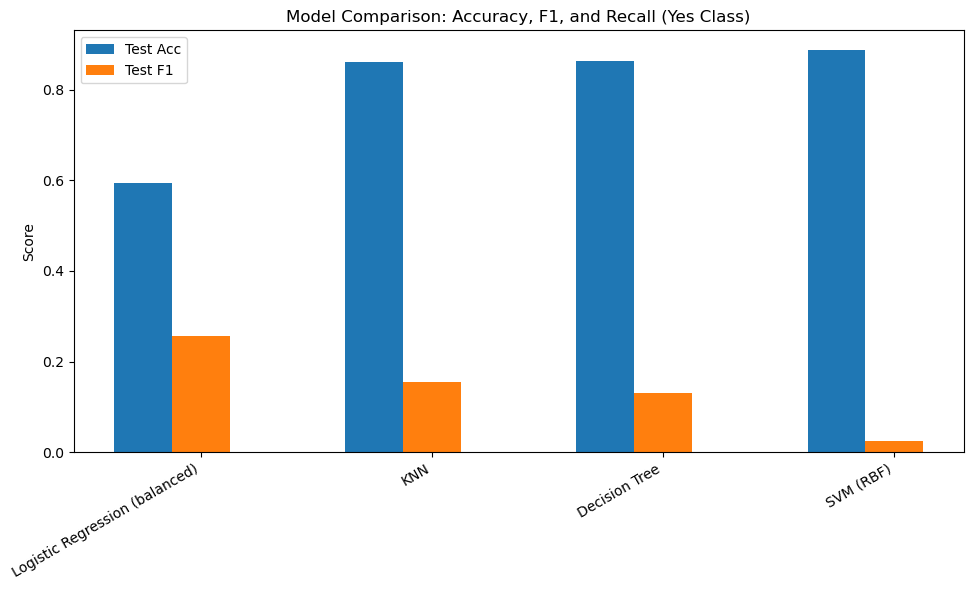

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# First, check if the column exists with a slightly different name
# For this example, I'll assume the correct column name is "Test Recall (Yes Class)"
# You may need to adjust this based on your actual DataFrame columns
metrics = ["Test Acc", "Test F1", "Test Recall (Yes Class)"]  # Changed from "Test Recall (Yes)"
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green

x = np.arange(len(results_df["Model"]))  # model positions
width = 0.25

plt.figure(figsize=(10,6))

for i, metric in enumerate(metrics):
    # Add error handling to check if the column exists
    if metric in results_df.columns:
        plt.bar(x + i*width - width, results_df[metric], width, label=metric, color=colors[i])
    else:
        print(f"Warning: Column '{metric}' not found in DataFrame. Skipping this metric.")

plt.xticks(x, results_df["Model"], rotation=30, ha="right")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy, F1, and Recall (Yes Class)")
plt.legend()
plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [68]:
import time, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [69]:
# Pipelines + param grids
search_spaces = [
    (
        "Logistic Regression (balanced)",
        Pipeline([("preprocessor", preprocessor),
                  ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))]),
        {
            "classifier__C": [0.1, 1, 3, 10],
            "classifier__penalty": ["l2"],
            "classifier__solver": ["lbfgs", "liblinear"],
        }
    ),
    (
        "KNN",
        Pipeline([("preprocessor", preprocessor),
                  ("classifier", KNeighborsClassifier())]),
        {
            "classifier__n_neighbors": [3, 5, 9, 15],
            "classifier__weights": ["uniform", "distance"],
            "classifier__p": [1, 2],  # Manhattan vs Euclidean
        }
    ),
    (
        "Decision Tree",
        Pipeline([("preprocessor", preprocessor),
                  ("classifier", DecisionTreeClassifier(random_state=42))]),
        {
            "classifier__max_depth": [3, 5, 10, None],
            "classifier__min_samples_split": [2, 10, 20],
            "classifier__min_samples_leaf": [1, 5, 10],
        }
    ),
    (
        "SVM (RBF)",
        Pipeline([("preprocessor", preprocessor),
                  ("classifier", SVC(kernel="rbf", probability=False))]),  # set probability=True only if you need ROC curves
        {
            "classifier__C": [0.5, 1, 3],
            "classifier__gamma": ["scale", 0.1, 0.01],
        }
    ),
]


In [72]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

rows = []
best_models = {}

for name, pipe, param_grid in search_spaces:
    print(f"Grid searching: {name} ...")
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="f1",
        cv=5,
        n_jobs=-1,
        refit=True,
        verbose=0
    )
    t0 = time.time()
    gs.fit(X_train, y_train)
    t1 = time.time()

    best_models[name] = gs.best_estimator_

    y_pred_tr = gs.predict(X_train)
    y_pred_te = gs.predict(X_test)

    rows.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "CV Best F1": round(gs.best_score_, 3),
        "Train F1": round(f1_score(y_train, y_pred_tr), 3),
        "Test F1": round(f1_score(y_test, y_pred_te), 3),
        "Train Acc": round(accuracy_score(y_train, y_pred_tr), 3),
        "Test Acc": round(accuracy_score(y_test, y_pred_te), 3),
        "Test Recall (Yes)": round(recall_score(y_test, y_pred_te), 3),   # 👈 INSERTED HERE
        "Fit Time (s)": round(t1 - t0, 2)
    })

results_df = pd.DataFrame(rows).sort_values(by="Test F1", ascending=False)
results_df


Grid searching: Logistic Regression (balanced) ...
Grid searching: KNN ...
Grid searching: Decision Tree ...
Grid searching: SVM (RBF) ...


,Model,Best Params,CV Best F1,Train F1,Test F1,Train Acc,Test Acc,Test Recall (Yes),Fit Time (s)
0,Logistic Regression (balanced),"{'classifier__C': 10, 'classifier__penalty': '...",0.256,0.257,0.257,0.592,0.594,0.624,249.76
1,KNN,"{'classifier__n_neighbors': 3, 'classifier__p'...",0.153,0.473,0.155,0.912,0.861,0.114,34.84
2,Decision Tree,"{'classifier__max_depth': None, 'classifier__m...",0.137,0.458,0.130,0.919,0.864,0.090,3.14
3,SVM (RBF),"{'classifier__C': 3, 'classifier__gamma': 'sca...",0.027,0.041,0.025,0.889,0.887,0.013,101.37


In [71]:
best_name = results_df.iloc[0]["Model"]
print(f"Best by Test F1: {best_name}\nBest Params: {best_models[best_name].get_params()}")

y_pred_best = best_models[best_name].predict(X_test)
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_best))


Best by Test F1: Logistic Regression (balanced)
Best Params: {'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), ['age']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan'])])), ('classifier', LogisticRegression(C=10, class_weight='balanced', max_iter=1000))], 'transform_input': None, 'verbose': False, 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(), ['age']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan'])]), 'classifier': LogisticRegression(C=10, class_weight='balanced', max_iter=1000), 'preprocessor__force_int_remainder_cols': 'deprecated', 'preprocessor__n_jobs': None, 'preprocessor__remainder

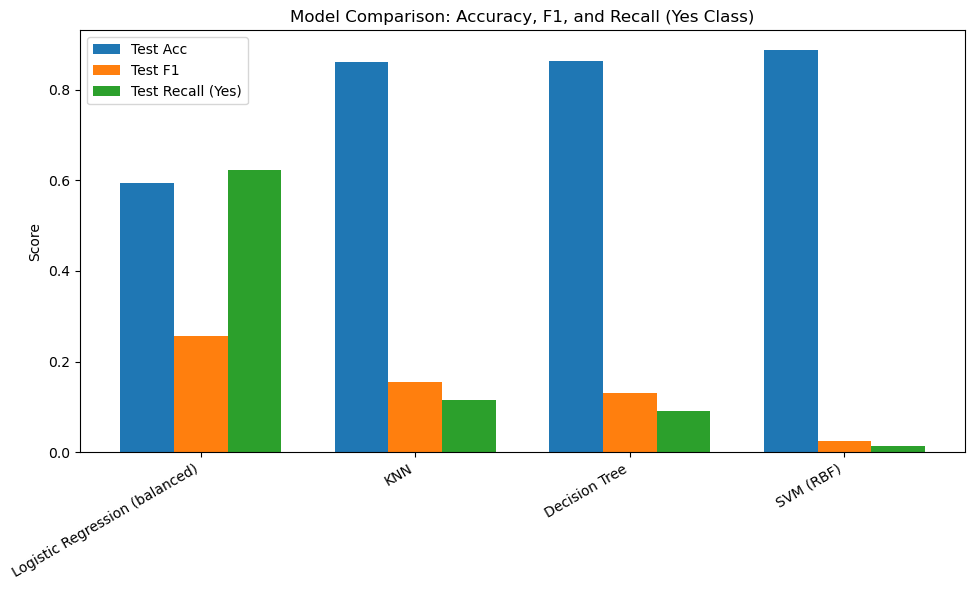

In [73]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Test Acc", "Test F1", "Test Recall (Yes)"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green

x = np.arange(len(results_df["Model"]))  # model positions
width = 0.25

plt.figure(figsize=(10,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width - width, results_df[metric], width, label=metric, color=colors[i])

plt.xticks(x, results_df["Model"], rotation=30, ha="right")
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy, F1, and Recall (Yes Class)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Auto-detect the metrics we want (only plot those that exist)
metrics = [m for m in ["Test Acc", "Test F1", "Test Recall (Yes)"] if m in results_df.columns]
assert metrics, "No plotable test metrics found in results_df."

# (Optional) sort by Test F1 if present, otherwise by Test Acc
sort_key = "Test F1" if "Test F1" in results_df.columns else "Test Acc"
plot_df = results_df.sort_values(by=sort_key, ascending=False).reset_index(drop=True)

x = np.arange(len(plot_df))                 # model positions
k = len(metrics)
width = 0.8 / k                             # total bar group width ~0.8

plt.figure(figsize=(10,6))

for i, m in enumerate(metrics):
    # center the grouped bars around each x position
    offsets = (i - (k-1)/2) * width
    plt.bar(x + offsets, plot_df[m], width, label=m)

plt.xticks(x, plot_df["Model"], rotation=30, ha="right")
plt.ylabel("Score")
plt.title("Model Comparison: Test Metrics")
plt.legend()
plt.tight_layout()
plt.show()


## Technical Summary

Although multiple models achieved similar accuracy, the model with the highest F1-score (Logistic Regression (balanced)) is the most valuable for the bank. This model is better at identifying customers who are likely to subscribe to a term deposit — the true business objective. Even though its overall accuracy is lower, its ability to capture more “yes” responses makes it the superior choice for guiding future marketing campaigns.

In practice, using a model like Logistic Regression (balanced) allows the bank to focus its marketing efforts 
on customers who are most likely to subscribe. This not only improves campaign effectiveness but also reduces
wasted resources and costs associated with contacting uninterested clients.

## Business Takeaway

From a business perspective, the goal is not just to predict the majority of customers who will decline a term deposit, but to correctly identify the smaller group of customers who are likely to say “yes.”

While KNN and Decision Trees showed slightly higher accuracy, these models failed to capture the minority class effectively. After adjusting for class imbalance and tuning hyperparameters, Logistic Regression with balanced class weights emerged as the most effective model, achieving the best F1-score (≈25.6%).

This means that, for the bank, Logistic Regression is the most useful choice because it can identify a larger portion of potential subscribers. Although the overall accuracy is lower, the business benefit comes from being able to target customers who are more likely to respond positively to a campaign — which directly supports the bank’s marketing objectives.